## Question 07

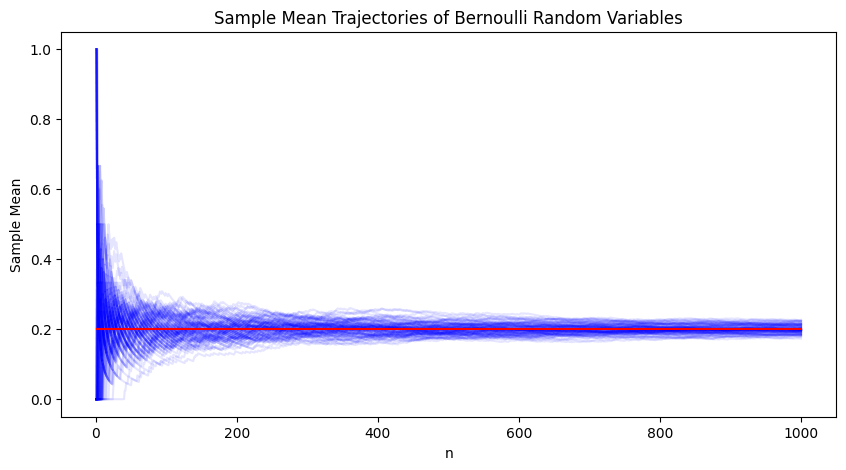

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

m = 100
N = 1000
mu = 0.2

# Shape: [sample, Bernoulli trials]
X = np.random.binomial(1, mu, (m, N))

# Shape: [sample, cumulative number of successes up to each trial]
X_cumsum = np.cumsum(X, axis=1)

# Shape: [sample, sample mean up to each trial]
X_mean = X_cumsum / np.arange(1, N + 1)

plt.figure(figsize=(10, 5))
for i in range(m):
    plt.plot(np.arange(1, N + 1), X_mean[i], alpha=0.1, color='blue')

plt.plot(np.arange(1, N + 1), np.full(N, mu), color='red')

plt.xlabel('n')
plt.ylabel('Sample Mean')
plt.title('Sample Mean Trajectories of Bernoulli Random Variables')
plt.show()

## Question 08

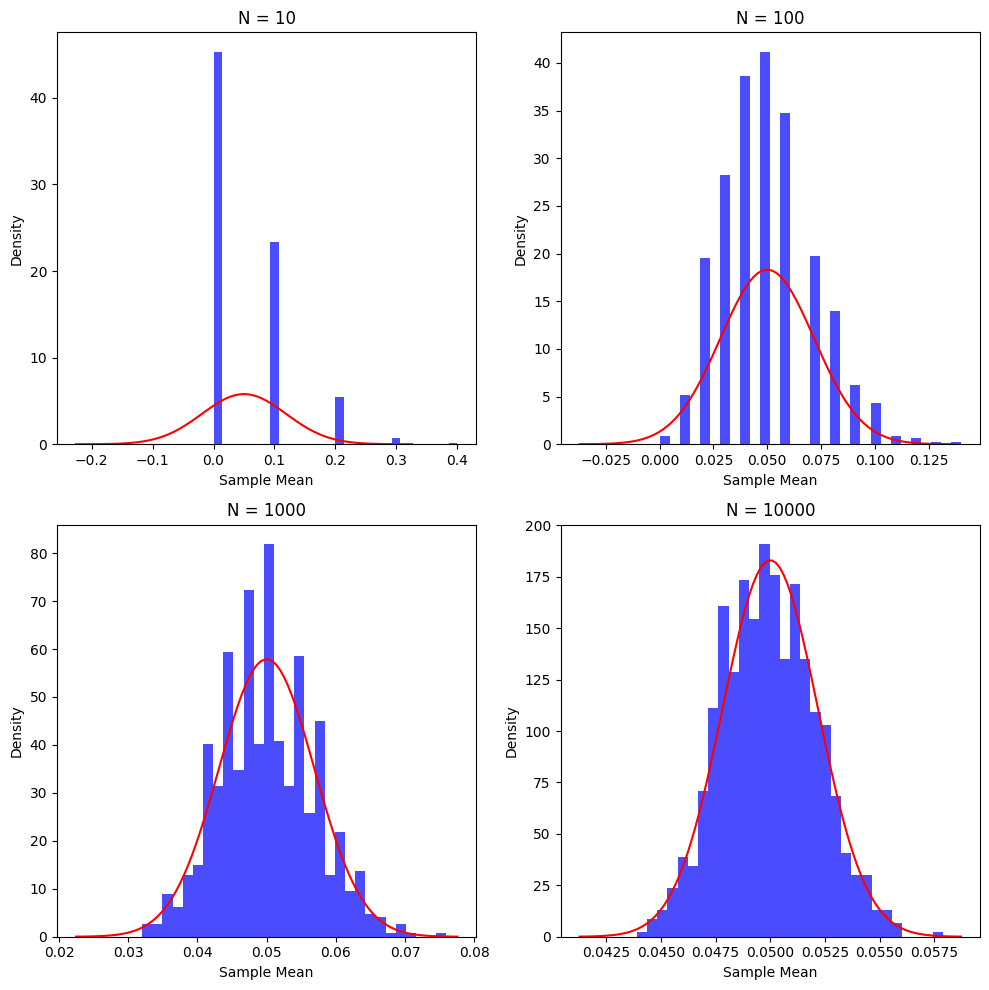

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(0)

N = [10, 100, 1000, 10000]
mu = 0.05
m = 1000

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, n in enumerate(N):
    # Shape: [sample, Bernoulli trials]
    X = np.random.binomial(1, mu, (m, n))

    # Shape: [sample, sample mean]
    X_mean = np.mean(X, axis=1)

    # Plot histogram
    axs[i // 2, i % 2].hist(X_mean, bins=30, density=True, color='blue', alpha=0.7)

    # CLT parameters
    mu_clt = mu

    # Since X is Bernoulli distributed, the variance is mu * (1 - mu)
    sigma_clt = np.sqrt(mu * (1 - mu) / n)

    # Plot Gaussian PDF using CLT parameters (since the sample mean is normally distributed)
    x = np.linspace(mu_clt - 4 * sigma_clt, mu_clt + 4 * sigma_clt, 100)

    # Plot the PDF of the normal distribution
    axs[i // 2, i % 2].plot(x, stats.norm.pdf(x, mu_clt, sigma_clt), color='red')

    axs[i // 2, i % 2].set_title(f'N = {n}')
    axs[i // 2, i % 2].set_xlabel('Sample Mean')
    axs[i // 2, i % 2].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Question 09

In [4]:
import numpy as np

np.random.seed(0)

N = 500 # Number of samples
mu = [0, 0] # Mean vector
cov = [[1, 0.6], [0.6, 1]] # Covariance matrix

# Generate samples from bivariate Gaussian distribution
X, Y = np.random.multivariate_normal(mu, cov, N).T # Shape: [N]

# Compute sample means
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Compute plug-in estimator of correlation
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sqrt(np.sum((X - X_mean)**2) * np.sum((Y - Y_mean)**2))

# Plug-in estimator of correlation to find the correlation
rho_hat = numerator / denominator

print(f'Plug-in estimator of correlation: {rho_hat}')

Plug-in estimator of correlation: 0.5826300529635126


## Question 10

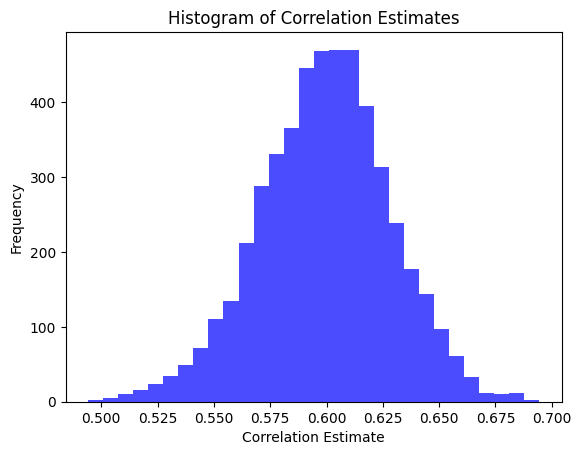

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 500 # Number of samples
m = 5000 # Number of iterations
mu = [0, 0] # Mean vector
cov = [[1, 0.6], [0.6, 1]] # Covariance matrix

rhos = [] # Store correlation estimates

for i in range(m):
    # Generate samples from bivariate Gaussian distribution
    X, Y = np.random.multivariate_normal(mu, cov, N).T # Shape: [N]

    # Compute sample means
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    # Compute plug-in estimator of correlation
    numerator = np.sum((X - X_mean) * (Y - Y_mean))
    denominator = np.sqrt(np.sum((X - X_mean)**2) * np.sum((Y - Y_mean)**2))

    # Plug-in estimator of correlation to find the correlation
    rho_hat = numerator / denominator
    rhos.append(rho_hat)

plt.hist(rhos, bins=30, color='blue', alpha=0.7)
plt.xlabel('Correlation Estimate')
plt.ylabel('Frequency')
plt.title('Histogram of Correlation Estimates')
plt.show()

## Question 11

In [6]:
# MSE = E[(rho_hat - rho)^2] (we found rho = 0.6 in the problem statement)
mse = np.mean((np.array(rhos) - 0.6)**2)

print(f'MSE of plug-in estimator: {mse}')
# >>> MSE of plug-in estimator: 0.0008393677723569983

MSE of plug-in estimator: 0.0008393677723569983
